In [19]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

EDA - Exploratory Data Analysis
----

__Contents__
- Checking Null Values
- Handling Null Values 
- Pairplot based on Potability
- Covariance,Correlation & Heatmap
- Countplot for Independent variable
- Splitting data into independent and dependent variables

In [20]:
df = pd.read_csv('water_potability.csv')
df.head()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
0,NaN,204.890455,20791.318981,7.300212,368.516441,564.308654,10.379783,86.990970,2.963135,0
1,3.716080,129.422921,18630.057858,6.635246,NaN,592.885359,15.180013,56.329076,4.500656,0
2,8.099124,224.236259,19909.541732,9.275884,NaN,418.606213,16.868637,66.420093,3.055934,0
3,8.316766,214.373394,22018.417441,8.059332,356.886136,363.266516,18.436524,100.341674,4.628771,0
4,9.092223,181.101509,17978.986339,6.546600,310.135738,398.410813,11.558279,31.997993,4.075075,0


__Checking For Null Values__

In [21]:
print("Features Vs Count of Null Values")
for col in df.columns:
    ct = df[col].isna().sum()
    if(ct) != 0:
        print(col,"=" ,ct)

Features Vs Count of Null Values
ph = 491
Sulfate = 781
Trihalomethanes = 162


In [22]:
print(df.shape)
df.describe().T

(3276, 10)


,count,mean,std,min,25%,50%,75%,max
ph,2785.0,7.080795,1.594320,0.000000,6.093092,7.036752,8.062066,14.000000
Hardness,3276.0,196.369496,32.879761,47.432000,176.850538,196.967627,216.667456,323.124000
Solids,3276.0,22014.092526,8768.570828,320.942611,15666.690297,20927.833607,27332.762127,61227.196008
Chloramines,3276.0,7.122277,1.583085,0.352000,6.127421,7.130299,8.114887,13.127000
Sulfate,2495.0,333.775777,41.416840,129.000000,307.699498,333.073546,359.950170,481.030642
Conductivity,3276.0,426.205111,80.824064,181.483754,365.734414,421.884968,481.792304,753.342620
Organic_carbon,3276.0,14.284970,3.308162,2.200000,12.065801,14.218338,16.557652,28.300000
Trihalomethanes,3114.0,66.396293,16.175008,0.738000,55.844536,66.622485,77.337473,124.000000
Turbidity,3276.0,3.966786,0.780382,1.450000,3.439711,3.955028,4.500320,6.739000
Potability,3276.0,0.390110,0.487849,0.000000,0.000000,0.000000,1.000000,1.000000


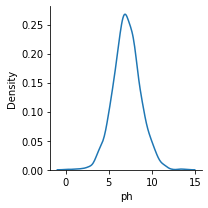

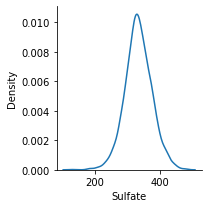

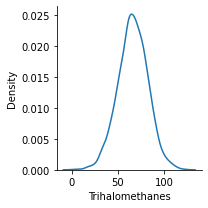

In [25]:
columns = ['ph','Sulfate','Trihalomethanes']

[sns.displot(df[col],kind='kde',height=3) for col in columns]

__Handling Null Values__

Mean will replace the NaN value as it is preferred if data is numeric and not skewed,
and from the displot we can see the same

In [26]:
# Imputing missing values
df['ph'] = df['ph'].fillna(df['ph'].mean())
df['Sulfate'] = df['Sulfate'].fillna(df['Sulfate'].mean())
df['Trihalomethanes'] = df['Trihalomethanes'].fillna(df['Trihalomethanes'].mean())
df.isnull().sum()

ph                 0
Hardness           0
Solids             0
Chloramines        0
Sulfate            0
Conductivity       0
Organic_carbon     0
Trihalomethanes    0
Turbidity          0
Potability         0
dtype: int64

__Pairplot based on Potability__

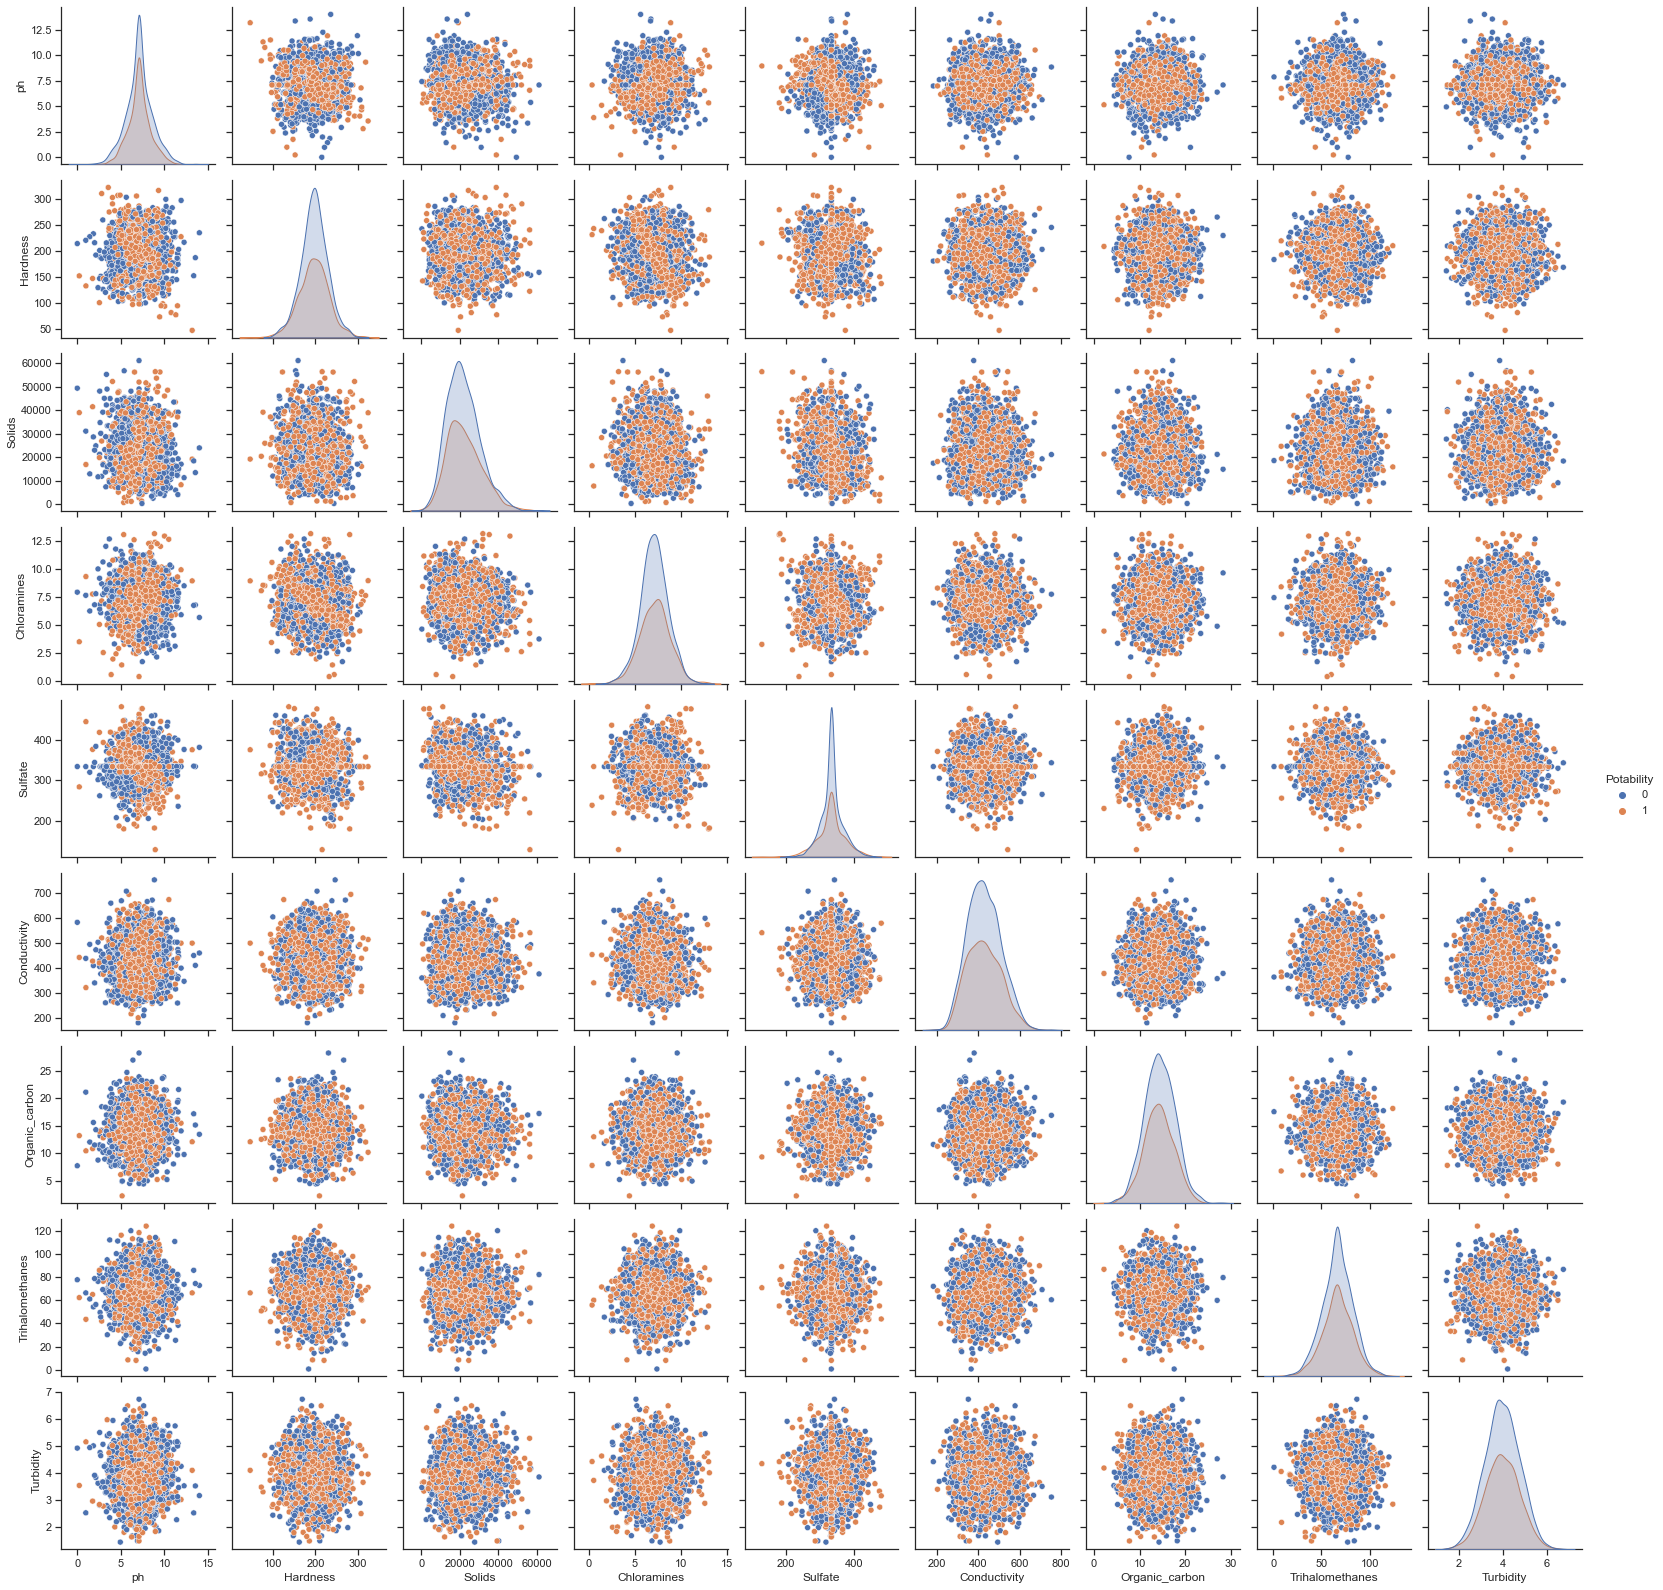

In [27]:
sns.set_theme(style="ticks")
sns.pairplot(df,hue="Potability")

__Covariance,Correlation & Heatmap__


In [29]:
print(df.cov())

                          ph      Hardness        Solids  Chloramines  \
ph                  2.160771      3.665148 -1.055433e+03    -0.074026   
Hardness            3.665148   1081.078715 -1.352149e+04    -1.564367   
Solids          -1055.432944 -13521.486526  7.688783e+07  -973.746052   
Chloramines        -0.074026     -1.564367 -9.737461e+02     2.506158   
Sulfate             0.765186   -110.239624 -4.748711e+04     1.361250   
Conductivity        2.042492    -63.552473  9.802117e+03    -2.621264   
Organic_carbon      0.194811      0.392670  2.971084e+02    -0.066268   
Trihalomethanes     0.069405     -6.579802 -1.227206e+03     0.415084   
Turbidity          -0.041551     -0.370747  1.337511e+02     0.002920   
Potability         -0.002357     -0.221943  1.443451e+02     0.018365   

                      Sulfate  Conductivity  Organic_carbon  Trihalomethanes  \
ph                   0.765186      2.042492        0.194811         0.069405   
Hardness          -110.239624    -63

                       ph  Hardness    Solids  Chloramines   Sulfate  \
ph               1.000000  0.075833 -0.081884    -0.031811  0.014403   
Hardness         0.075833  1.000000 -0.046899    -0.030054 -0.092766   
Solids          -0.081884 -0.046899  1.000000    -0.070148 -0.149840   
Chloramines     -0.031811 -0.030054 -0.070148     1.000000  0.023791   
Sulfate          0.014403 -0.092766 -0.149840     0.023791  1.000000   
Conductivity     0.017192 -0.023915  0.013831    -0.020486 -0.014059   
Organic_carbon   0.040061  0.003610  0.010242    -0.012653  0.026909   
Trihalomethanes  0.002994 -0.012690 -0.008875     0.016627 -0.025605   
Turbidity       -0.036222 -0.014449  0.019546     0.002363 -0.009790   
Potability      -0.003287 -0.013837  0.033743     0.023779 -0.020619   

                 Conductivity  Organic_carbon  Trihalomethanes  Turbidity  \
ph                   0.017192        0.040061         0.002994  -0.036222   
Hardness            -0.023915        0.003610        

<AxesSubplot:>

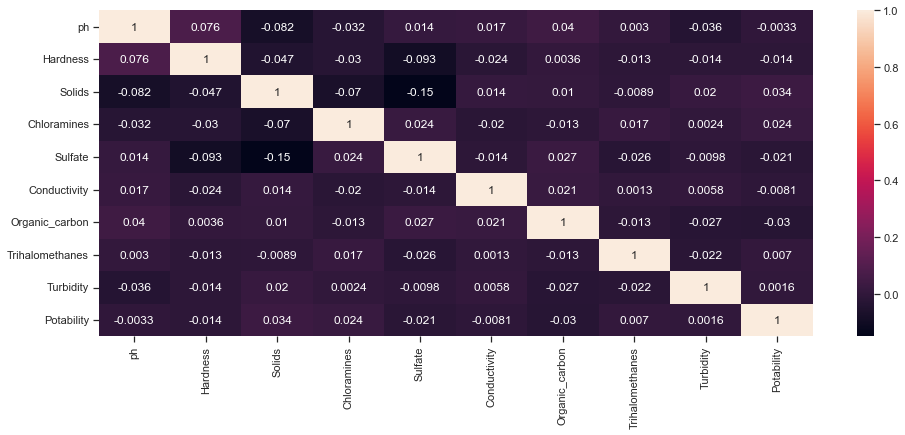

In [30]:
corr = df.corr()
print(corr)
plt.figure(figsize=(16,6))
sns.heatmap(corr,annot=True)

__Countplot for Independent variable__

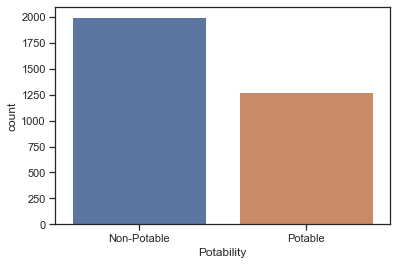

In [34]:
sns.countplot(x="Potability", data=df, saturation=0.7)
plt.xticks(ticks=[0,1],labels=['Non-Potable','Potable'])
plt.show()

__Splitting data into independent and dependent variables__

In [36]:
X = df.drop('Potability', axis=1)
y = df['Potability']
print(X.shape,y.shape)

(3276, 9) (3276,)


Splitting data into Test and Train
---

In [37]:
from sklearn.model_selection import train_test_split
X = df.drop('Potability',axis=1)
y = df['Potability']  
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 4)

Model Selection
----


Importing Models

In [45]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier
from sklearn.svm import SVC
from sklearn.pipeline import make_pipeline
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import RobustScaler

     ------------------------------------- 125.4/125.4 MB 10.9 kB/s eta 0:00:00


ERROR: Could not install packages due to an OSError: [WinError 5] Access is denied: 'c:\\Users\\samar\\Desktop\\Python\\Streamlit_DS_Projects\\.venv\\Lib\\site-packages\\xgboost\\lib\\xgboost.dll'
Check the permissions.

You should consider upgrading via the 'c:\Users\samar\Desktop\Python\Streamlit_DS_Projects\.venv\Scripts\python.exe -m pip install --upgrade pip' command.


Pipelining -> https://scikit-learn.org/stable/modules/generated/sklearn.pipeline.Pipeline.html

Python scikit-learn provides a Pipeline utility to help automate machine learning workflows. Pipelines work by allowing for a linear sequence of data transforms to be chained together culminating in a modeling process that can be evaluated.

Robust Scaler -> https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.RobustScaler.html

Making Pipeline 

In [47]:
preprocessor = make_pipeline(RobustScaler())
RandomPipeline = make_pipeline(preprocessor,RandomForestClassifier(n_estimators=300,min_samples_leaf=0.16, random_state=42))
DescisionPipeline = make_pipeline(DecisionTreeClassifier(max_depth=5, random_state=42))
xgPipeline = make_pipeline(XGBClassifier(max_depth= 8, n_estimators= 125, random_state= 0,  learning_rate= 0.03, n_jobs=5))
SVMPipeline = make_pipeline(preprocessor,SVC(kernel='rbf', random_state = 42,probability=True))
KNNPipeline = make_pipeline(preprocessor,KNeighborsClassifier(n_neighbors=9, leaf_size=20))
LRPipeline = make_pipeline(preprocessor,LogisticRegression(max_iter=120,random_state=0, n_jobs=20))

Model Dictionary
---

In [48]:
dict_of_models = {'RandomForest': RandomPipeline,
'XGBoost': xgPipeline,
'SVM': SVMPipeline,
'KNN': KNNPipeline,
'DescisionForest': DescisionPipeline,
'LR': LRPipeline}

Model Evaluation
---

---------------------------------
RandomForest
Accuracy =  0.6202686202686203
-
[[508   0]
 [311   0]]
-
              precision    recall  f1-score   support

           0       0.62      1.00      0.77       508
           1       0.00      0.00      0.00       311

    accuracy                           0.62       819
   macro avg       0.31      0.50      0.38       819
weighted avg       0.38      0.62      0.47       819

-
{'RandomForest': 0.6202686202686203}
---------------------------------
XGBoost
Accuracy =  0.673992673992674
-
[[455  53]
 [214  97]]
-
              precision    recall  f1-score   support

           0       0.68      0.90      0.77       508
           1       0.65      0.31      0.42       311

    accuracy                           0.67       819
   macro avg       0.66      0.60      0.60       819
weighted avg       0.67      0.67      0.64       819

-
{'XGBoost': 0.673992673992674}
---------------------------------
SVM
Accuracy =  0.6727716727716728
-

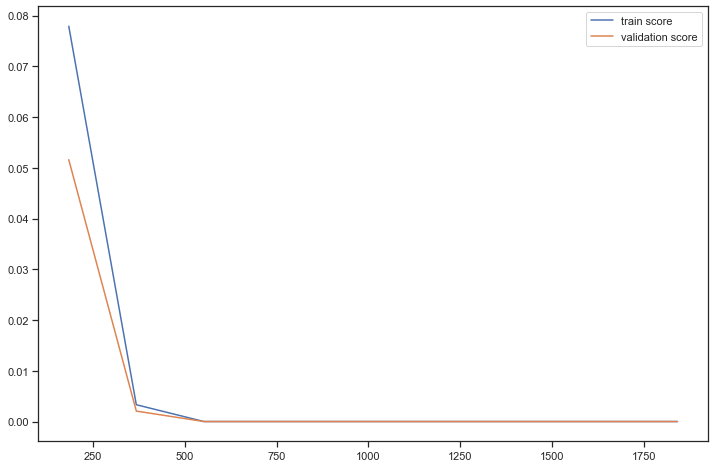

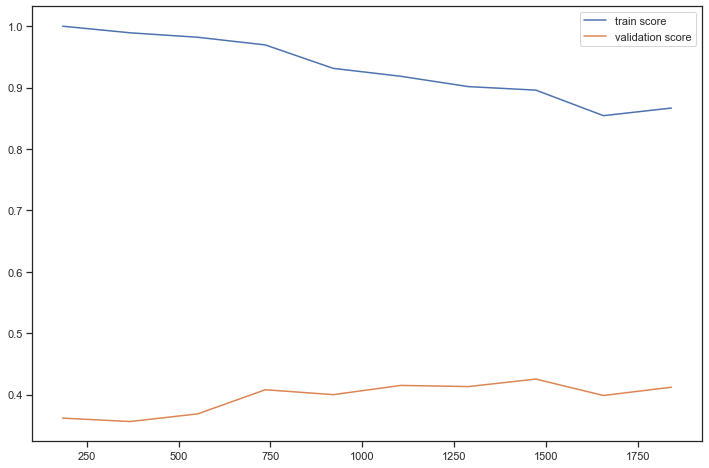

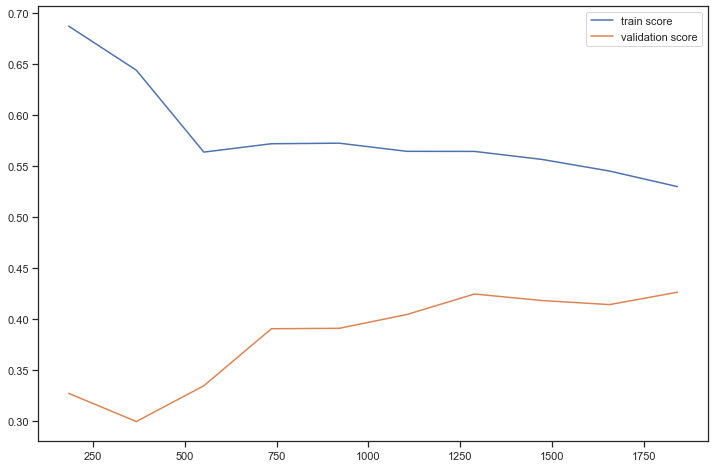

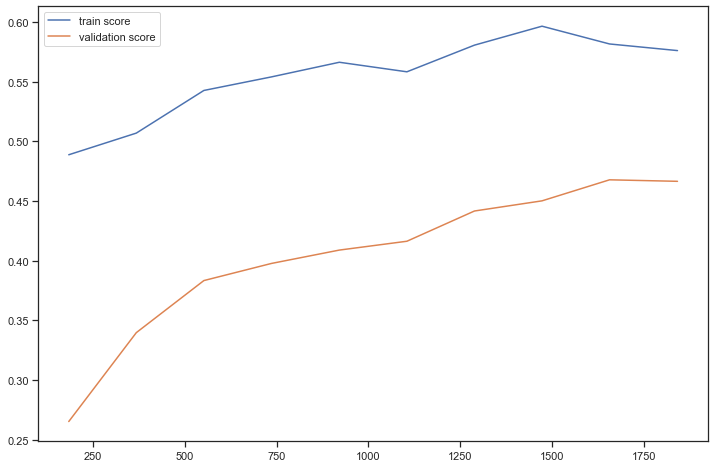

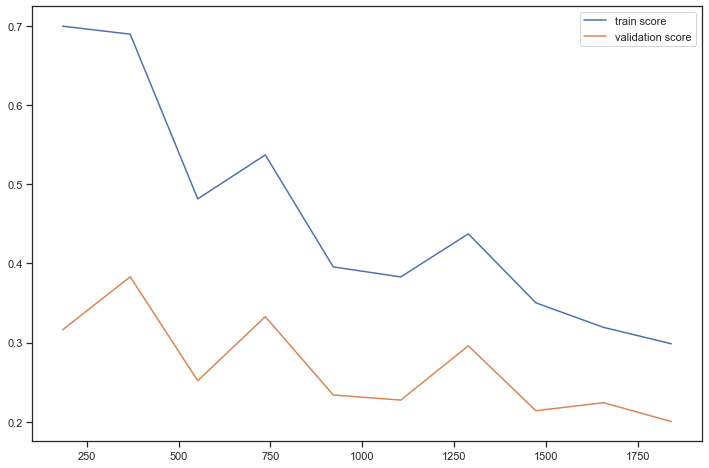

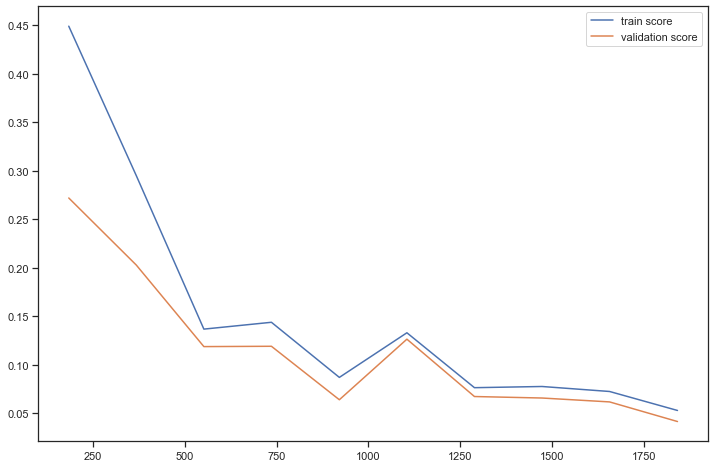

In [52]:
from sklearn.metrics import f1_score, accuracy_score, confusion_matrix, classification_report, roc_curve
from sklearn.model_selection import learning_curve

def evaluation(model):
    model.fit(X_train, y_train)
    # calculating the probabilities
    y_pred_proba = model.predict_proba(X_test)
    # finding the predicted valued
    y_pred = np.argmax(y_pred_proba,axis=1)
    #argmax() function returns indices of the max element of the array in a particular axis.
    acc = accuracy_score(y_test, y_pred)
    print('Accuracy = ',acc)
    print('-')
    print(confusion_matrix(y_test,y_pred))
    print('-')
    print(classification_report(y_test,y_pred))
    print('-')
    
    N, train_score, val_score = learning_curve(model, X_train, y_train, 
                                               cv=4, scoring='f1', 
                                               train_sizes=np.linspace(0.1,1,10))
    plt.figure(figsize=(12,8))
    plt.plot(N, train_score.mean(axis=1), label='train score')
    plt.plot(N, val_score.mean(axis=1), label='validation score')
    plt.legend()
    return acc
test = []
for name, model in dict_of_models.items():
    print('---------------------------------')
    print(name)
    t_acc={}
    acc1 = evaluation(model)
    t_acc[name]=acc1
    print(t_acc)
    test.append(t_acc)

Model Accuracy Comparison
----

,Accuracy Score
Model,
XGBoost,0.673993
SVM,0.672772
KNeighbours,0.658120
Decision Tree,0.625153
Random Forest,0.620269
Logistic Regression,0.617827


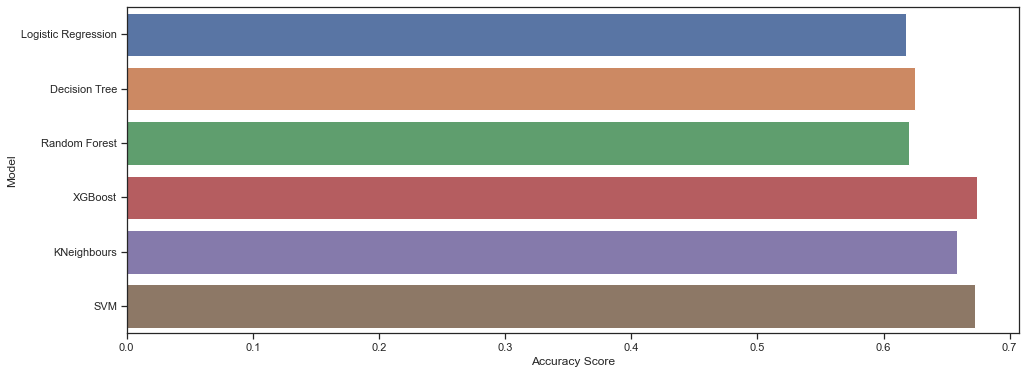

In [54]:
dataList = ([test[5].values(), test[4].values(), test[0].values(), test[1].values(), test[3].values(), test[2].values()])
models = pd.DataFrame(list(dataList),columns=['Accuracy Score'],index = ['Logistic Regression', 'Decision Tree', 'Random Forest', 'XGBoost', 'KNeighbours', 'SVM'])
index = models.index
index.name = "Model"
models.head()
plt.figure(figsize=(16,6))
sns.barplot(x='Accuracy Score', y=index, data=models)

models.sort_values(by='Accuracy Score', ascending=False)

ROC Curve
---

An ROC curve (receiver operating characteristic curve) is a graph showing the performance of a classification model at all classification thresholds. 

This curve plots two parameters:
True Positive Rate  & False Positive Rate.

True Positive Rate (TPR) is a synonym for recall.

An ROC curve plots TPR vs. FPR at different classification thresholds. Lowering the classification threshold classifies more items as positive, thus increasing both False Positives and True Positives. The following figure shows a typical ROC curve.

RandomForest :  0.6202686202686203


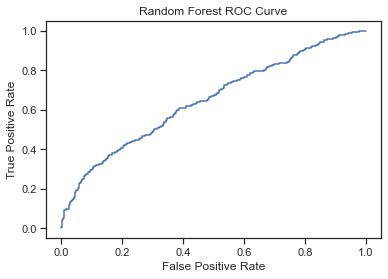

XGBoost :  0.673992673992674


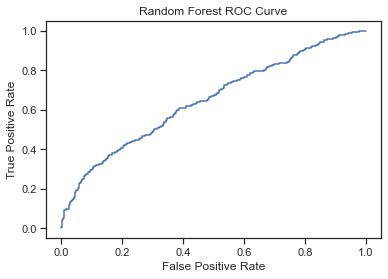

SVM :  0.6727716727716728


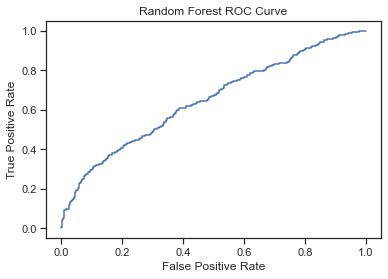

KNN :  0.6581196581196581


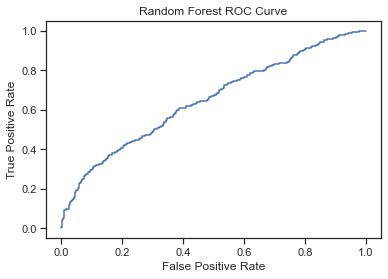

DescisionForest :  0.6251526251526252


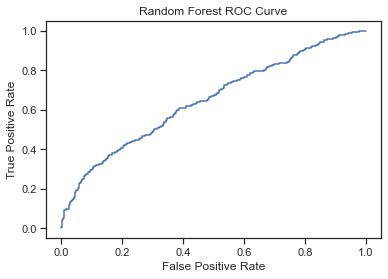

LR :  0.6178266178266179


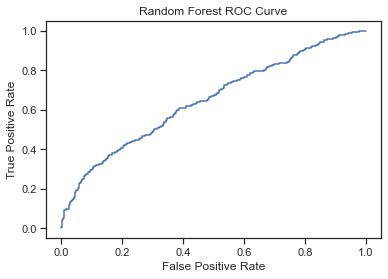

In [57]:
dict_of_models = {'RandomForest': RandomPipeline,
'XGBoost': xgPipeline,
'SVM': SVMPipeline,
'KNN': KNNPipeline,
'DescisionForest': DescisionPipeline,
'LR': LRPipeline}

for name, model in dict_of_models.items():
    model.fit(X_train, y_train)
    y_proba = model.predict_proba(X_test)
    y_pred = np.argmax(y_proba,axis=1)

    print(name,": ", accuracy_score(y_test, y_pred))
    y_pred_prob = xgPipeline.predict_proba(X_test)[:,1]

    fpr,tpr,threshols=roc_curve(y_test,y_pred_prob)

    plt.plot(fpr,tpr,label='Random Forest Curve')
    plt.xlabel("False Positive Rate")
    plt.ylabel("True Positive Rate")
    plt.title("Random Forest ROC Curve")
    plt.show()